<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/HW2/PhillyParks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 : Summary statistics

this homework performs strictly an exploratory analysis of the data

Consult the https://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf Python for Data Analysis book (pandas book) chapter 7 or this digital rendition of its content here https://github.com/fedhere/PUS2020_FBianco/blob/master/HW2/PandasCh7.ipynb. 

Also use the code examples in the folder classdemo https://github.com/fedhere/PUS2020_FBianco/tree/master/classdemo

**important**
turn in the notebook by uploading it to your github repository in a folder called HW2. Before you uploade the notebook make sure you 
- click above: Runtime -> Restart and run all

this will assure that your notebook has not bugs due to running the cells of code out of order.


In [1]:
# you should only need the packathon pandas
import pandas as pd

## Read in the data about the Philly parks 
you can find the data at 
http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv")

In [2]:
pparks = pd.read_csv('http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv')

In [3]:
# show the shape of the parks file dataframe
pparks.shape

(522, 25)

In [4]:
pparks.columns

Index(['OBJECTID', 'PUBLIC_NAME', 'PARENT_NAME', 'NESTED', 'OFFICIAL_NAME',
       'LABEL', 'ALIAS', 'DPP_ASSET_ID', 'ADDRESS911', 'ZIPCODE',
       'ADDRESS_BRT', 'ALIAS_ADDRESS', 'ACREAGE', 'PROPERTY_CLASSIFICATION',
       'PPR_USE', 'PPR_DISTRICT', 'PPR_OPS_DISTRICT', 'COUNCIL_DISTRICT',
       'POLICE_DISTRICT', 'CITY_SCALE_MAPS', 'LOCAL_SCALE_MAPS',
       'PROGRAM_SITES', 'COMMENTS', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [5]:
pparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,NaN,1903,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...",400-16 S TANEY ST;Pine & Taney;338-46 S 26TH S...,3.379158,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,Y,NaN,23295.664062,892.868012
1,2,Schuylkill Banks,Schuylkill Banks,N,NaN,Schuylkill Banks,NaN,2794,400 S TANEY ST,19103,NaN,400-16 S TANEY ST,14.717314,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,7,"5, 7","2, 5","9, 17",Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.179688,9300.670289
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...","Pine & Taney;400-16 S TANEY ST, 338-46 S 26TH ...",7.327000,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,N,NaN,50512.582031,1259.304657
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Boat Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,5625 TACONY ST,5650 Tacony St,19.398075,NEIGHBORHOOD_PARK,BOATHOUSE_LAUNCH,2,2,6,15,Y,Y,N,NaN,133961.171875,1641.529044
4,5,Orthodox Street Park,Orthodox Street Park,N,NaN,Orthodox,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,3101 ORTHODOX ST,NaN,16.229629,NEIGHBORHOOD_PARK,UNDEVELOPED,5,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,112026.734375,1679.085206


In [6]:
pparks.tail()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
517,518,Sedgely and Fletcher Warehouse,Sedgely and Fletcher Warehouse,N,NaN,Sedgely Warehouse,Sedgley Storeroom;Maintenance Warehouse,99999,2528 W SEDGLEY AVE,19132,2528-34 W SEDGLEY AVE,W Sedgley Ave & N 26th St;2528-34 W SEDGLEY AVE,0.773902,NEIGHBORHOOD_PARK,OPERATIONS,6,6,5,22,N,Y,N,School District leases to PPR.,5341.640625,356.178092
518,519,Fox Chase - Lorimer Trail Greenway (Rhawn),Fox Chase - Lorimer Trail Greenway (Rhawn),N,NaN,Fox Chase - Lorimer Greenway,NaN,99999,439 RHAWN ST,19111,NaN,Rhawn St and Elberon Ave;8217 BURHOLME AVE,3.589356,NEIGHBORHOOD_PARK,UNDEVELOPED,1,1,10,7,Y,Y,N,No Public Access. Undeveloped Land awaiting Fo...,24840.667969,2152.448099
519,520,Bartrams Mile Trail Greenway,Bartrams Mile Trail Greenway,N,NaN,Bartrams Trail Greenway,Bartram's Mile; Bartrams South,0,NaN,19143,NaN,NaN,9.217030,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,9,8,3,"12,18",Y,N,N,In Development,63509.933594,2635.375719
520,521,Loretto and Gilham Triangle,Loretto and Gilham Triangle,N,NaN,Loretto and Gilham,Cranford Ave andd Magee Ave Traffic Island; No...,245,1385 GILHAM ST,19111,Registry - 144N070092,6540 LORETTO AVE,0.161596,POCKET_PARK,BREEZEWAY_ISLAND,1,2,9,2,Y,Y,N,NaN,1116.867188,144.694698
521,522,Rail Park,Rail Park,N,The Rail Park,Rail Park,NaN,99999,1250 NOBLE ST,19123,NaN,1136 CALLOWHILL ST,0.872112,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,10,5,1,6,Y,Y,N,Elevated former railway.,6009.941406,825.079151


## meausre the central tendency of the Philly park sizes
measure the mean and the median and compare them

In [7]:
meanps = pparks['ACREAGE'].mean()

In [8]:
# show the median size of the dataframe 
# are they the same? 
medianps =  pparks['ACREAGE'].median()

In [9]:
print('Mean:', meanps)
print('Median:', medianps)

Mean: 23.238296223045964
Median: 3.59385373


what can you conclude from 
 the values of the mean and median you extracted? (discuss in a text cell below)

The mean is significantly larger than the median. This indicates that the dataset has a lot of outliers and that the dataset is skewed to the right.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if __name__ == '__main__':


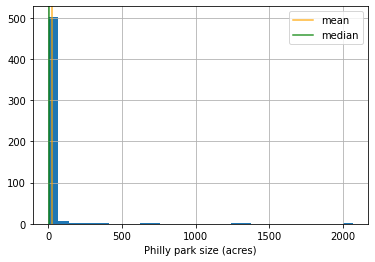

In [10]:
# visualize a histogram of the park size. 
# you can use the method of the ACREAGE column .hist()
# choose an appropriate number of bins with the argument bins=
# overplot on the histogram the mean and the median of the distribution
ax = pparks.ACREAGE.hist(bins=30)
ax.set_xlabel('Philly park size (acres)')
ax.axvline(meanps, color='orange', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(medianps, color='green', linestyle='solid', linewidth=1.5, alpha = .8)
ax.legend([meanps, medianps], labels = ['mean', 'median'])



Figure Caption: This figure shows the ditrubition of park sizes in Philadelphia. Mean is also plotted in orange
 while median is plotted in green. The majority of parks are shown to be in the first bin of just over 0 acres. However, there are a few outliers with sizes of over 500, 1000, and 2000 acres.  The mean is larger than the median, indicating outliers to the right of the distribution.


## what is the spread of park sizes?
calculate the standard deviation of the park sized

In [11]:
stdps = pparks['ACREAGE'].std()
stdps

131.88319179881643

## select only a subset of the parks: the pasks smaller than 10 acres
calculate the mean and median and plot a histogram of the park sized with the mean and median indicated on the plot

In [12]:
# Select parks smaller than 10 acres
psmall = pparks.loc[pparks['ACREAGE'] < 10]
psmall.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,NaN,1903,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...",400-16 S TANEY ST;Pine & Taney;338-46 S 26TH S...,3.379158,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,Y,NaN,23295.664062,892.868012
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...","Pine & Taney;400-16 S TANEY ST, 338-46 S 26TH ...",7.327000,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,N,NaN,50512.582031,1259.304657
15,16,Whitby Avenue Playground,Cobbs Creek Park,Y,NaN,Whitby,,1372,1300 COBBS CREEK PKY,19143,NaN,NaN,5.167033,NEIGHBORHOOD_PARK,MISC_PARK,8,8,3,12,Y,Y,N,NaN,35613.878906,906.065942
16,17,Holme Avenue Field,Pennypack Park,Y,NaN,NaN,,3088,2761 HOLME AVE,19152,NaN,NaN,1.158622,NEIGHBORHOOD_PARK,ATHLETIC_OTHER,1,1,6,8,N,N,N,NaN,8013.515625,453.300062
17,18,29th and Passyunk Park,29th and Passyunk Park,N,NaN,29th and Passyunk,,432,2827 W PASSYUNK AVE,19145,2827 W PASSYUNK AVE,Newkirk & Passyunk,0.556027,NEIGHBORHOOD_PARK,MISC_PARK,9,7,2,1,Y,Y,N,Owned by PennDOT,3830.242188,247.032048


In [13]:
# Calculate mean and median
means = psmall['ACREAGE'].mean()
medians = psmall['ACREAGE'].median()
print('Mean:', means)
print('Median:', medians)

Mean: 2.9079506748410746
Median: 2.05984969


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys


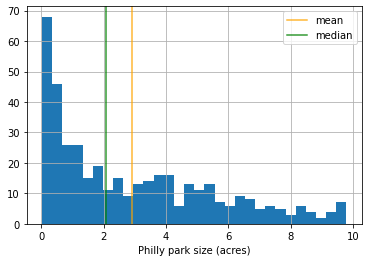

In [14]:
# if you need help with this step do ask me about boolean arrays used as indices
# and slicing of arrays and series! remember we have a slack channel #hw2
ax = psmall.ACREAGE.hist(bins=30)
ax.set_xlabel('Philly park size (acres)')
ax.axvline(means, color='orange', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(medians, color='green', linestyle='solid', linewidth=1.5, alpha = .8)
ax.legend([means, medians], labels = ['mean', 'median'])

Figure Caption: This figure shows the ditrubition of park sizes in Philadelphia that are less than 10 acres. Mean is also plotted in orange while median is plotted in green. The majority of parks are shown to be in the first bin, between 0 and 2 acres showing a positive skew. The mean is also slightly larger than the median indicating the right skew of the data. By eliminating the large parks the mean and median are much closer as the outliers aren't influencing the mean as greatly. 


# Challenge

the parks listed in each row are in some cases subsets of larger parks. The "parent" park is listed under PARENT_NAME. 

The challenge is to visualize the distribution of sizes of the  parent parks. To do that you have to aggregate the parks based on the "PARENT_NAME" value and sum the size of the parks. The methods of the dataframe you want to use are 
```.groupby()```
and 
```.sum()```

In [15]:
# Group Parks
park_group = pparks.groupby(['PARENT_NAME']).sum()
park_group

,OBJECTID,DPP_ASSET_ID,ZIPCODE,ACREAGE,Shape__Area,Shape__Length
PARENT_NAME,,,,,,
10th and Lemon Playground,40,2914,19123,0.218346,1505.957031,169.462813
11th and Cecil B Moore Playground,183,1135,19122,5.181687,35754.375000,755.891229
12th and Cambria Playground,263,1800,19133,2.337384,16136.882812,542.995987
17th and Carpenter Play Lot,514,99999,19146,0.282406,1946.351562,184.887743
18th and Jackson War Memorial,390,1215,19145,0.083384,574.429688,148.363162
...,...,...,...,...,...,...
Womrath Park,265,120,19124,2.167689,14970.460938,591.724807
Wooden Bridge Run,75,1632,19114,49.095863,339623.484375,4653.000056
Woodside Park,252,1840,19131,2.619738,18088.925781,615.286813


In [16]:
# Calculate mean and median
meang = park_group['ACREAGE'].mean()
mediang = park_group['ACREAGE'].median()
print('Mean:', meang)
print('Median:', mediang)

Mean: 30.86613391458016
Median: 2.99613878


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


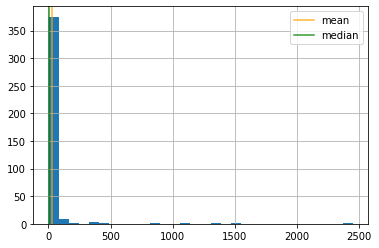

In [17]:
ax = park_group.ACREAGE.hist(bins=30)
ax.axvline(meang, color='orange', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(mediang, color='green', linestyle='solid', linewidth=1.5, alpha = .8)
ax.legend([meang, mediang], labels = ['mean', 'median'])

Figure Caption: This figure shows the ditrubition of park sizes in Philadelphia grouped by the parent name of the parks. Mean is also plotted in orange while median is plotted in green. Grouping the parks by parent name caused park sizes to go up, increasing the mean and median. This is because small parks that are part of a bigger system are grouped together and their areas are added together.

What could you measure about this new dataset obtained by grouping the data by PARENT_NAME that would allow you to investigate further the difference in the two dataset? 

In [18]:
stdg = park_group['ACREAGE'].std()
stdg

179.68182861173878

The standard deviation of the grouped dataset is larger than the original dataset, showing that there is more spread to the data when parks are grouped by their parent name.